# **Salifort Motors - Employee Retention Project**

### **About the company**
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

### **Business case**
As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points you deem helpful. 

#### **Objective**

Analyze survey data collected by the HR department to identify key factors influencing employee turnover.
Build predictive models to forecast whether an employee is likely to leave based on factors such as department, number of projects, average monthly hours, and potentially other relevant data points.
Provide actionable insights to the senior leadership team on strategies to improve employee retention and job satisfaction based on model findings.

### **Contents:** 
 1. [Imports and data loading](#1)
 2. [Exploratory Data Analysis](#2)
 3. [Building a Machine Learning Model](#3)
 4. [Conclusions and Business Recommendations](#4)

<a id="1"></a>
### **1. Imports and data loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option("display.max_columns", None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, precision_score, recall_score,\
accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,\
PrecisionRecallDisplay,classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Function that helps plot feature importance
from xgboost import plot_importance

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# For saving models
import pickle

/kaggle/input/sm-employees-data/SM_employees.csv


In [2]:
# Load dataset into dataframe
df = pd.read_csv("/kaggle/input/sm-employees-data/SM_employees.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<a id="2"></a>
### **2. Exploratory Data Analysis**

 - Understand your variables
 - Clean your dataset (missing data, redundant data, outliers)

#### **Gather basic information about the data**

In [3]:
# Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There are no null registers in the dataset.

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### **Rename columns**

There are some columns that should be renamed in order to standardize the column names so that they are all in snake_case and make column names more concise.

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                        'time_spend_company': 'tenure',
                        'average_montly_hours': 'average_monthly_hours',
                        'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### **Check missing values**

In [7]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the dataset.

#### **Check duplicates**

In [8]:
# Check for duplicates
df.duplicated().sum()

3008

There are 3008 duplicated registers which represent about 20% from the total number of rows in the dataset (14999 entries).

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In order to understand if the duplicates rows are valid entries from different employees with very similar responses or the duplicates are error entries that should be droped, we will pick all the registers with same average_monthly_hours.

In [10]:
df[(df.duplicated()) & (df["average_monthly_hours"]==128)].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
866,0.41,0.46,2,128,3,0,1,0,accounting,low
12028,0.41,0.46,2,128,3,0,1,0,accounting,low
12058,0.38,0.54,2,128,3,0,1,0,technical,low
12208,0.44,0.50,2,128,3,0,1,0,support,low
12243,0.40,0.50,2,128,3,0,1,0,sales,low


It is unlikely that different employees have absolutely same entrie values. The duplicates hsould be droped.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df.drop_duplicates(keep='first').reset_index(drop=True)

# Display first few rows of new dataframe as needed
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


#### **Check outliers**

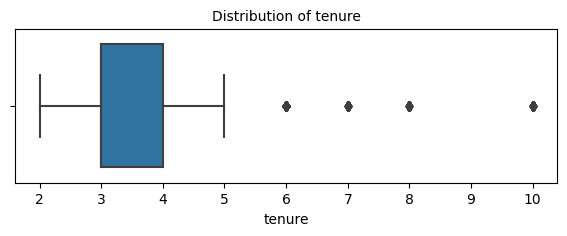

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(7,2))
plt.title('Distribution of tenure', fontsize=10)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are some outliers in the tenure distribution.
We should determine the number of rows containing outliers.

In [13]:
# Determine the number of rows containing outliers
Q1 = df1["tenure"].quantile(0.25)
Q3 = df1["tenure"].quantile(0.75)

tenure_iqr = Q3 - Q1

tenure_upper_limit = Q3 + 1.5 * tenure_iqr
tenure_lower_limit = Q1 - 1.5 * tenure_iqr

tenure_outliers = df1[(df1["tenure"] > tenure_upper_limit) | (df1["tenure"] < tenure_lower_limit)]

print(f"Number of rows containing outliers: {tenure_outliers.shape[0]}")

Number of rows containing outliers: 824


There are 824 rows containing outliers, but no measure will be taken.
The models I intend to use are robust to outliers in the data, as they make decisions based on splits that are less sensitive. 

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Now, examine variables and create plots to visualize relationships between variables in the data.

#### **Average monthly hours worked and number of projects**

Create a stacked boxplot showing *average_monthly_hours* distributions for *number_project*, comparing the distributions of employees who stayed versus those who left.

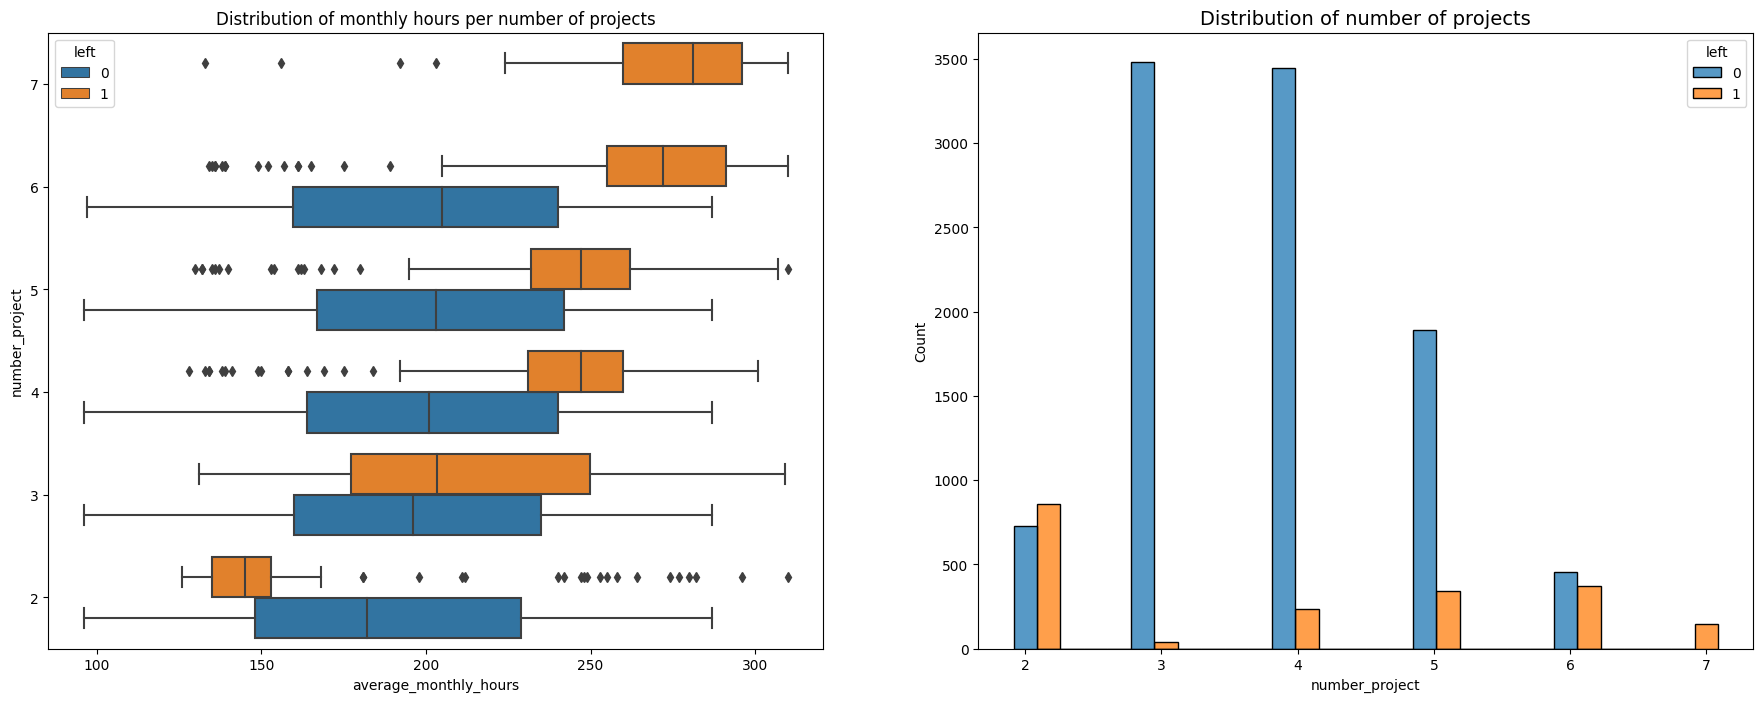

In [15]:
# Create a plot
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing "average_monthly_hours" distributions for "number_project", 
# comparing employees who stayed versus those who left
sns.boxplot(data=df1, 
            x="average_monthly_hours", 
            y="number_project", 
            hue="left", 
            orient="h", 
            ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Distribution of monthly hours per number of projects", 
                fontsize="12")

# Create histogram showing distribution of "number_project", 
# comparing employees who stayed versus those who left
tenure_stay = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1, 
             x="number_project", 
             hue="left", 
             multiple="dodge", 
             shrink=2, 
             ax=ax[1])
ax[1].set_title('Distribution of number of projects', fontsize='14')

# Display the plots
plt.show()

It's intuitive that employees handling more projects tend to work longer hours, which is supported by the data, showing an increase in average hours for both those who stayed and left as the number of projects rises. However, a few key insights emerge from the analysis:
 - Employees who left the company can be categorized into two groups: (A) those who worked significantly fewer hours than their peers on similar projects, and (B) those who worked far more hours. Group A might include employees who were terminated or those who had already resigned and were given fewer hours as they transitioned out. Group B, on the other hand, likely consists of those who quit due to excessive workloads, potentially being the top contributors on their projects.
All employees who worked on seven projects left the company, and for those involved in six projects, their interquartile range of 255–295 hours per month was much higher than any other group.
The most satisfied are the employees that are contributing from 3 to 5 projects.
Average monthly hours: The majority of employees that left were working around 150 hours pe month or more than 220.
Considering a typical work schedule of 40 hours per week, the average monthly working hours should be around 166.67. At Salifort Motors nearly all groups worked far beyond this number of hours suggesting that overwork is a significant issue.


In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1["number_project"]==7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

Next, you could examine salary levels for different tenures.

In [17]:
df1[df1["left"]==1]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1986,0.37,0.57,2,147,3,0,1,0,sales,low
1987,0.11,0.92,7,293,4,0,1,0,sales,low
1988,0.41,0.53,2,157,3,0,1,0,sales,low
1989,0.84,0.96,4,247,5,0,1,0,sales,low


Text(0.5, 1.0, 'Employees that left: Salary histogram by tenure')

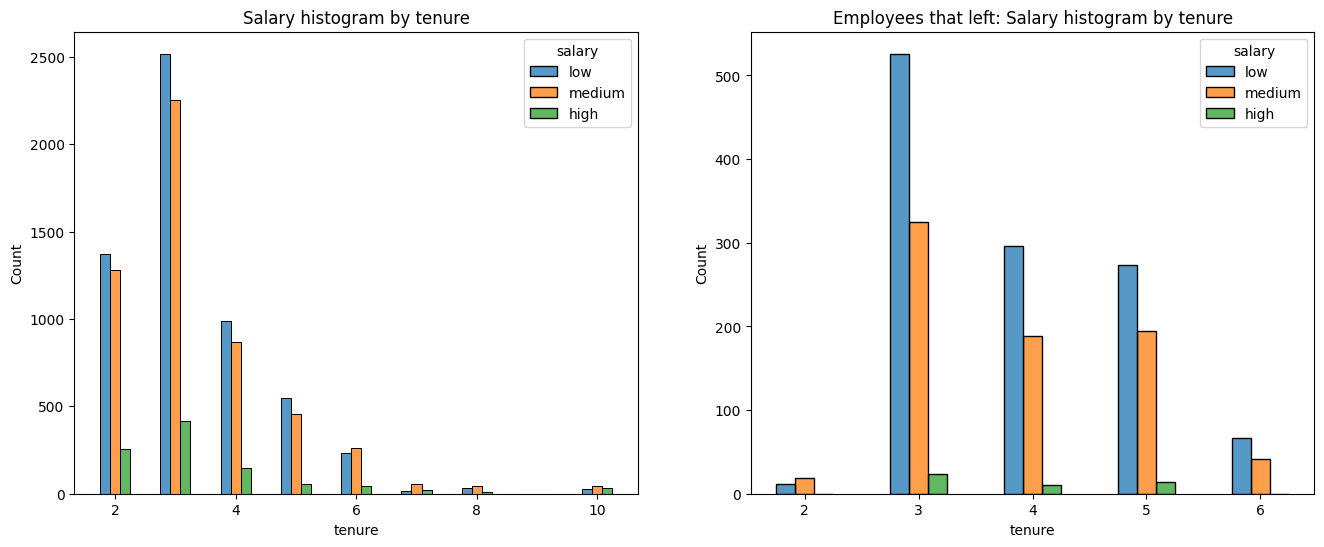

In [18]:
# Distribution of employees by tenure and salary 
# vs the same distribution only for employees that left
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (16,6))
# Plot tenure and salary 
sns.histplot(data=df1, x="tenure", hue="salary", discrete=1, 
             hue_order=["low", "medium", "high"], multiple="dodge", shrink=.5, ax=ax[0])

ax[0].set_title("Salary histogram by tenure", fontsize=12)

# Plot employees that left, tenure and salary 
df1_left = df1[df1["left"]==1]
sns.histplot(data=df1_left, x="tenure", hue="salary", discrete=1, 
             hue_order=["low", "medium", "high"], multiple="dodge", shrink=.5, ax=ax[1])

ax[1].set_title("Employees that left: Salary histogram by tenure", fontsize=12)

The first histogram indicates that salary levels are fairly distributed across employees with varying tenure lengths. The second histogram reveals that most employees who left the company had low salaries, particularly those with 3 to 5 years of tenure, with 3 years being a critical period.

#### **Average monthly hours worked and satisfaction level**
Next, you could examine the average monthly hours versus the satisfaction levels.

Text(0.5, 1.0, 'Relationship between average monthly hours worked and satisfaction level')

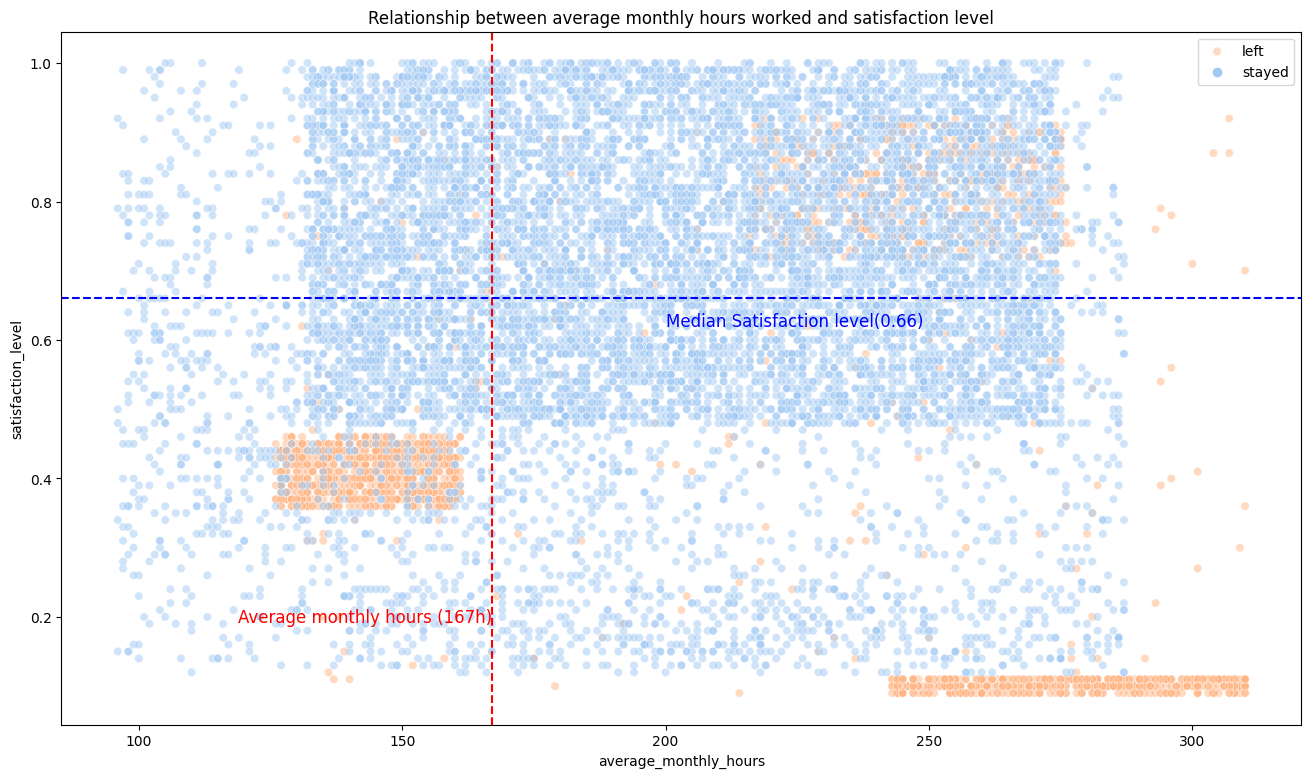

In [19]:
# Create scatterplot of "average_monthly_hours" versus "satisfaction_level", 
# comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, 
                x="average_monthly_hours", 
                y="satisfaction_level", 
                hue="left", 
                palette = sns.color_palette("pastel"),
                alpha=0.5)

plt.axvline(x=167, color="red", ls="--")
plt.text(167, 0.2, "Average monthly hours (167h)", 
         color="red", fontsize=12, va="center", ha="right")
plt.axhline(y=0.66, color="blue", ls="--")
plt.text(200, 0.64, "Median Satisfaction level(0.66)", 
         color="blue", fontsize=12, va="top", ha="left")

plt.legend(labels=["left", "stayed"])
plt.title("Relationship between average monthly hours worked and satisfaction level")

From the scatterplot, we can observe two distinct groups of employees who left: those who were overworked but performed well, and those who worked slightly less than the average of 167 hours per month and received lower evaluation scores.

There seems to be a relationship between the number of hours worked and evaluation scores. However, working longer hours doesn’t necessarily lead to better performance evaluations, as evidenced by the relatively few employees in the upper-left quadrant (high hours, low evaluation). Additionally, most employees in this company tend to work well beyond 167 hours per month.

#### **Average monthly hours worked and promotions in the last 5 years**
Next, examine whether employees who worked very long hours were promoted in the last five years.

Text(0.5, 1.0, 'Relationship between average monthly hours worked and promotions')

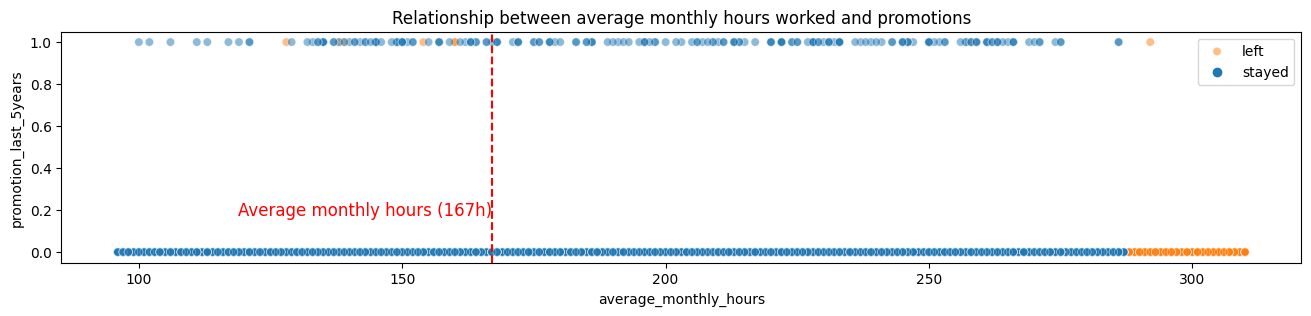

In [20]:
# Create plot to examine relationship between "average_monthly_hours" 
# and "promotion_last_5years"
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, 
                x="average_monthly_hours", 
                y="promotion_last_5years", 
                hue="left", 
                alpha=0.5)
plt.axvline(x=167, color="red", ls="--")
plt.text(167, 0.2, "Average monthly hours (167h)", 
         color="red", fontsize=12, va="center", ha="right")
plt.legend(labels=["left", "stayed"])
plt.title("Relationship between average monthly hours worked and promotions")

Form the plot, we can conclude that the most employees that left were working the most monthly hours and didn't have a promotion during the last 5 years.

#### **Number of projects and Satisfaction Level**

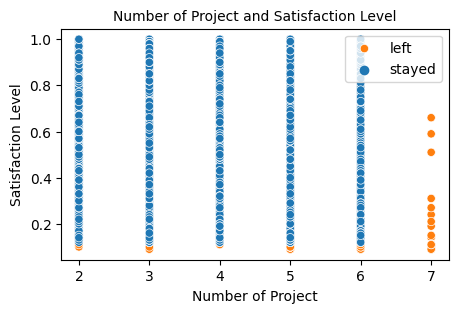

In [21]:
# Create a plot as needed
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df1, x = "number_project", y = "satisfaction_level", hue = "left")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")
plt.title("Number of Project and Satisfaction Level", fontsize=10)
plt.legend(labels=["left", "stayed"])
plt.show()

All employees involved in 7 projects left the company, and they also had low satisfaction levels. In other project groups, only those with low satisfaction levels chose to leave.

#### **The distribution across departments of the employees who left the company**

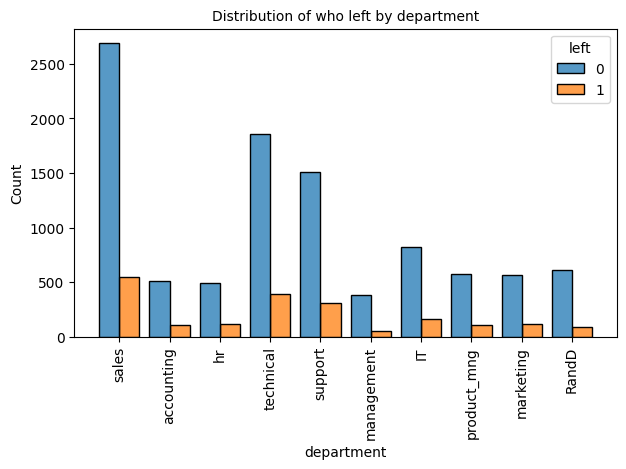

In [22]:
# Create stacked histogram to compare department distribution of employees 
# who left to that of employees who didn't
plt.figure(figsize=(7,4))
sns.histplot(data=df1, x="department", hue="left", discrete=1, 
             hue_order=[0, 1], multiple="dodge", shrink=.8)
plt.xticks(rotation=90)
plt.title("Distribution of who left by department", fontsize=10);

The turnover is proportional through all Salifort Motors departments.

#### **The heatmap of correlation between the left and other variables.**

Check for strong correlations between variables in the dataset.

Text(0.5, 1.0, 'Correlation Heatmap')

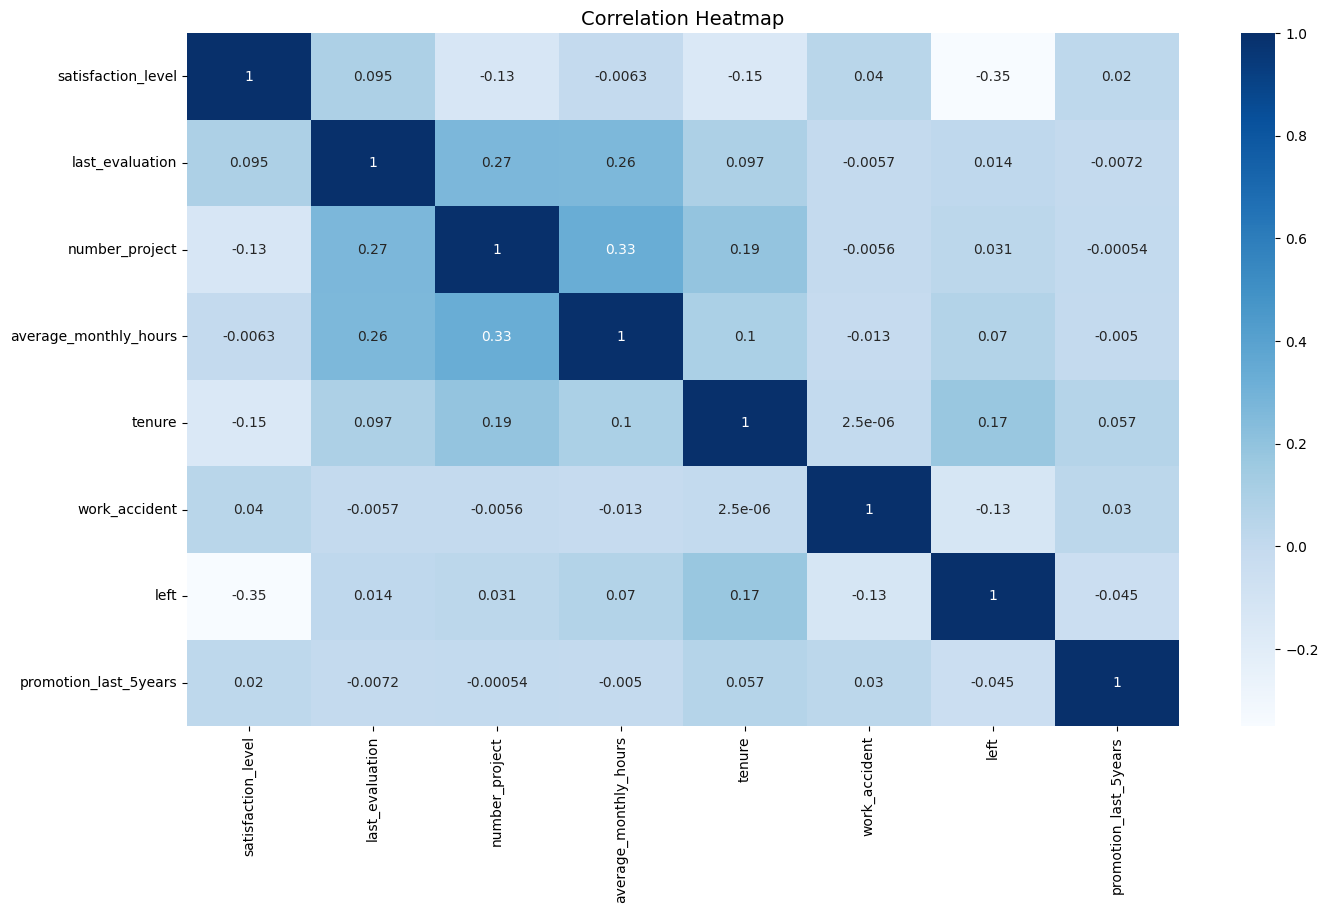

In [23]:
# Eliminate columns that contain non-numeric data.
corr_df = df1.select_dtypes(include=['float64', 'int64'])
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_df.corr(), cmap='Blues', annot=True)
plt.title("Correlation Heatmap", fontsize=14)

From the correlation heatmap we can conclude that the variables: number of projects, monthly hours, and evaluation scores are positively correlated with each other, while an employee's likelihood of leaving is negatively correlated with their satisfaction level.

#### EDA Insights:

 - The most influential features for predicting employee turnover are average monthly hours, satisfaction level, last evaluation, number of projects and tenure.
 - Employees are most satisfied when involved in 3 to 5 projects.
 - Employees that are most likely to leave, work less than 150 hours per month or more than 220 hours.
 - An indicative of turnover risk are the extreme levels of satisfaction: very low < 0.4 and very high - above 0.7. So a high satisfaction level is not a good predictor if the employee is willing to leave.
 - Employees with very low or mediocre evaluations are more likely to consider leaving.
 - Salary can have a significant impact on the employees willingness to stay. Employees with high and medium salaries are less likely to leave.
 - Turnover is evenly distributed across Salifort Motors departments.
 - Tenure - employees with 3 to 5 years are more keen to quit.
  
<a id="3"></a>
### **3. Building a Machine Learning Model**

 - Fit a model that predicts the outcome variable using two or more independent variables
 - Check model assumptions
 - Evaluate the model
 

#### **Identify the type of prediction task.**

I chose “left” and it is already a binary variable. It was selected based on its relevance to predicting whether or not an employee will leave the company.

#### **Identify the types of models most appropriate for this task.**
For this project, I choose Random Forest and XGBoost models to predict employee turnover. Both of these models are effective in handling complex relationships and non-linear patterns.

**Random Forest:**
 - It's an ensemble model that combines multiple decision trees, reducing the risk of overfitting and handling noisy data well.
 - Random Forest captures complex, non-linear interactions between features, which are important in predicting employee turnover.
 - It provides feature importance, allowing you to identify key factors influencing employee turnover.
 
**XGBoost**:
 - XGBoost is known for its superior accuracy and speed, especially with large datasets.
 - It deals well with imbalanced data, which is common in turnover prediction (e.g., fewer employees leaving compared to staying).
 - XGBoost optimizes computation and performs well with missing data or noisy inputs.
 - It can be easily fine-tuned, which gives more flexibility in improving model performance.
 
### **3.1. Random forest**

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

#### **Encoding**

Before splitting the data, encode the non-numeric variables. There are two: *department* and *salary*.

*department* is a categorical variable, which means you can dummy it for modeling.

*salary* is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [24]:
# Copy the dataframe
df1_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df1_enc['salary'] = (
    df1_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df1_enc = pd.get_dummies(df1_enc, drop_first=False)

# Display the new dataframe
df1_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#### **Model Building**

In [25]:
# Separate the dataset into labels (y) and features (X).
# Define the y (target) variable
X = df1_enc.drop("left",axis=1)
# Define the X (predictor) variables
y = df1_enc["left"]

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=24)

#### **Tune the Model**

In [26]:
# Instantiate model
rf = RandomForestClassifier(random_state=24)

# Assign a dictionary of hyperparameters to search over
cv_params = {"n_estimators" : [200, 300, 500],
              "max_depth" : [3, 5, None],
              "min_samples_leaf" : [0.5, 1, 2],
              "min_samples_split" : [0.5, 1, 2],
              "max_features" : [1.0],
              "max_samples" : [.5,.9]}

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy", 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [27]:
%%time
# Fit the model. 
rf_cv.fit(X_train, y_train)

CPU times: user 14min 31s, sys: 3.65 s, total: 14min 35s
Wall time: 14min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1, 2],
                         'min_samples_split': [0.5, 1, 2],
                         'n_estimators': [200, 300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

In [28]:
# Check best params
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [29]:
# Check best AUC score on CV
rf_cv.best_score_

0.9794612148929764

Save the model.

In [30]:
# Define a path to the folder where you want to save the model
path = '/kaggle/working/'

# Define a function to pickle the model.
def write_pickle(path, model_object, save_as:str):  

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
             
# Write pickle
write_pickle(path, rf_cv, "rf_cv")

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [31]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {"auc": "mean_test_roc_auc",
                   "precision": "mean_test_precision",
                   "recall": "mean_test_recall",
                   "f1": "mean_test_f1",
                   "accuracy": "mean_test_accuracy"
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall],
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]
                        })
  
    return table

In [32]:
# Get all CV scores
rf_cv_results = make_results('Random Forest cv', rf_cv, 'auc')
print(rf_cv_results)

              model  precision    recall        f1  accuracy       AUC
0  Random Forest cv   0.958458  0.909573  0.933322  0.978427  0.979461


Next, you can evaluate the final model on the test set.
Define a function that gets all the scores from a model's predictions.

In [33]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.
    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision], 
                          "recall": [recall],
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [34]:
# Get predictions on test data
rf_test_scores = get_scores('Random Forest1 test', rf_cv, X_test, y_test)
rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest1 test,0.950719,0.929719,0.940102,0.98032,0.960059


In [35]:
table = pd.concat([rf_cv_results, rf_test_scores])
print(table)

                 model  precision    recall        f1  accuracy       AUC
0     Random Forest cv   0.958458  0.909573  0.933322  0.978427  0.979461
0  Random Forest1 test   0.950719  0.929719  0.940102  0.980320  0.960059


These results indicate that **Random Forest model** is performing well across both cross-validation and test sets, with high precision, recall, F1-score, accuracy, and AUC. This suggests that the model is accurately predicting employee turnover with strong overall performance.

Next, use the optimal parameters found via GridSearchCV.

In [36]:
# Use optimal parameters on GridSearchCV.
rf_optimal = RandomForestClassifier(n_estimators = 300,
                                    max_depth = 5,
                                    min_samples_leaf = 2,
                                    min_samples_split = 2,
                                    max_features = 1.0,
                                    max_samples = 0.9,
                                    random_state = 24)

# Fit the optimal model.
rf_optimal.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.9,
                       min_samples_leaf=2, n_estimators=300, random_state=24)

Use the fit() method to train rf_opt on X_train and y_train. And predict on the test set using the optimal model.

In [37]:
# Predict on test set.
y_pred = rf_optimal.predict(X_test)

# Get predictions
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

optimal_RF_scores = pd.DataFrame({"model": "RF optimal param test",
                          "precision": [precision], 
                          "recall": [recall],
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]
                         })


table = pd.concat([table, optimal_RF_scores])
print(table)

                   model  precision    recall        f1  accuracy       AUC
0       Random Forest cv   0.958458  0.909573  0.933322  0.978427  0.979461
0    Random Forest1 test   0.950719  0.929719  0.940102  0.980320  0.960059
0  RF optimal param test   0.948875  0.931727  0.940223  0.980320  0.960863


#### **Evaluate the model**

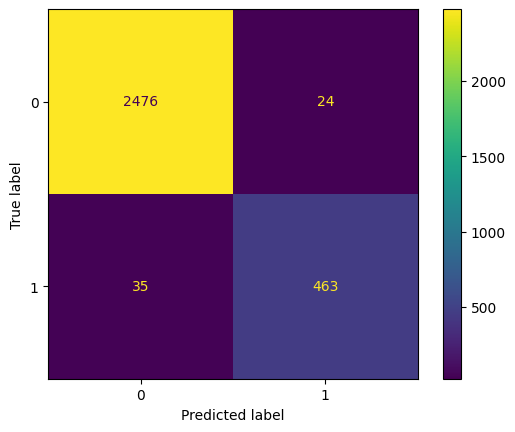

In [38]:
# Construct and display your confusion matrix.
# Construct the confusion matrix for your predicted and test values.
model_pred = rf_cv.predict(X_test)
# Create the display for your confusion matrix.
cm = confusion_matrix(y_test, model_pred, labels=rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf_cv.classes_)
# Plot the visual in-line.
disp.plot()

When observing the confusion matrix, we can notice the following: 
 - True Positives (TP): The number of correctly predicted positive cases. 
 - True Negatives (TN): The number of correctly predicted negative cases. 
 - False Positives (FP): The number of incorrect positive predictions. 
 - False Negatives (FN): The number of incorrect negative predictions. 

This breakdown shows that the model is performing well, with very few false positives and false negatives, indicating a good balance between precision and recall.

The **Random Forest with optimal parameters** performs slightly better in terms of **AUC** (0.961) compared to the other test results, while the **precision, recall, F1, and accuracy** are quite similar across models.

The models are consistently high-performing across all metrics, suggesting strong predictive capabilities.

### **3.2. XGBoost Model**

First create the XGB Classifier model and define its objective. Use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [39]:
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective="binary:logistic", random_state = 24)

#### **Define the parameters for hyperparameter tuning**

Define the parameters for hyperparameter tuning
To identify suitable parameters for your xgboost model, first define the parameters for hy- perparameter tuning. Specifically, define a range of values for max_depth, min_child_weight, learning_rate, n_estimators, subsample, and colsample_bytree.
Consider a more limited range for each parameter to allow for timely iteration and model training.

In [40]:
# Define parameters for tuning as `cv_params`.
cv_params = { "max_depth": [4, 6, None],
             "min_child_weight": [3, 5],
             "learning_rate": [0.2, 0.3],
             "n_estimators": [10, 15, 20],
             "subsample": [0.6, 0.9],
             "colsample_bytree": [0.8, 1.0]}

# Using the same scoring as RF
# Construct your GridSearch.
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = "f1")

In [41]:
%%time
# fit the GridSearch model to training data
xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 3min 48s, sys: 1.41 s, total: 3min 49s
Wall time: 1min 8s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=24, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.2, 0.3], 'max_depth': [4, 6, None],
                         'min_child_weight': [3, 5],
                         'n_estimators': [10, 15, 20],
                         'subsample': [0.6, 0.9]},
             refit='f1',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

In [42]:
# Use `pickle` to save the trained model.
write_pickle(path, xgb_cv, "xgb_cv")

#### **Results and evaluation**

In [43]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = xgb_cv.predict(X_test)

In [44]:
xgb_cv.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 20,
 'subsample': 0.9}

In [45]:
xgb_cv.best_score_

0.9438694753342766

#### **Evaluate XGBoost model’s performance**

In [46]:
# Get predictions
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

XGBoost_scores = pd.DataFrame({"model": "XGB model test",
                          "precision": [precision], 
                          "recall": [recall],
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]
                         })

print(XGBoost_scores)

            model  precision    recall        f1  accuracy       AUC
0  XGB model test   0.980851  0.925703  0.952479  0.984656  0.961051


- The **XGBoost model** demonstrates strong performance with high precision, accuracy, and F1-score, indicating that it makes accurate predictions while balancing between precision and recall effectively.
- The **AUC of 0.961** indicates excellent ability to distinguish between employees who stay and those who leave, showing that the model performs very well in binary classification tasks.

This result suggests that XGBoost is a powerful model for predicting employee turnover.

#### **Gain clarity with the confusion matrix**

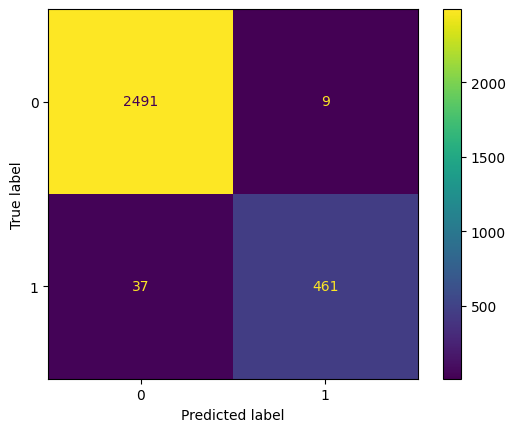

In [47]:
# Construct and display your confusion matrix.
# Construct the confusion matrix for your predicted and test values.
model_pred = xgb_cv.predict(X_test)
# Create the display for your confusion matrix.
cm = confusion_matrix(y_test, model_pred, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = xgb_cv.classes_)
# Plot the visual in-line.
disp.plot()

This indicates that the model is performing very well, with a low number of false predictions. Specifically, it has a very low **false negative** rate, which is crucial in minimizing the risk of missing employees who are likely to leave.

#### **Visualize most important features**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

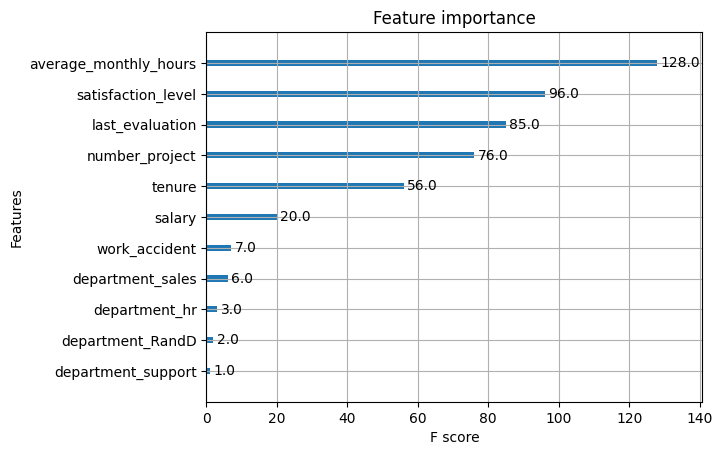

In [48]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_)

There is a clear outscream from “average_monthly_hours” variable with a big importance on the predicted variable. Key factors influencing turnover also include satisfaction level, last evaluation, number of projects, tenure, and salary.

#### **Compare models**

In [49]:
models_table = pd.concat([rf_cv_results, XGBoost_scores], ignore_index=True)
print(models_table)

              model  precision    recall        f1  accuracy       AUC
0  Random Forest cv   0.958458  0.909573  0.933322  0.978427  0.979461
1    XGB model test   0.980851  0.925703  0.952479  0.984656  0.961051


1. **Precision**: XGBoost (0.981) has higher precision than Random Forest (0.958), meaning it makes fewer false positive predictions.
2. **Recall**: XGBoost (0.926) also has a slightly higher recall compared to Random Forest (0.910), indicating it catches more true positive cases of employee turnover.
3. **F1-Score**: XGBoost has a higher F1-score (0.952) than Random Forest (0.933), reflecting a better balance between precision and recall.
4. **Accuracy**: XGBoost outperforms Random Forest slightly in accuracy (0.985 vs 0.978), meaning it makes more correct predictions overall.
5. **AUC**: Random Forest (0.979) has a higher AUC than XGBoost (0.961), meaning it may be slightly better at distinguishing between the two classes (stay/leave) overall.

### Conclusion:
- **XGBoost** outperforms **Random Forest** in most metrics like precision, recall, F1-score, and accuracy, making it the stronger overall model.
- However, **Random Forest** has a slightly higher AUC, indicating marginally better class separation in some cases.

Both models perform very well, but XGBoost is preferable for this task due to its stronger precision and recall balance.

<a id="4"></a>
### **4. Conclusions and Business Recommendations**

***Which independent variables did you choose for the model and why?***
The independent variable chosen for the model was selected based on its relevance to predicting whether or not an employee will leave the company. I chose “left".

***Are each of the assumptions met?***
For ensemble machine learning models such as Random Forest and XGBoost there is no need to check on linearity or multicollinearity assumption. However, there are still some consideration to keep in mind:
  - Independence of observations. So, during EDA stage, the duplicated instances were removed.
  - Tree-Based Models Robustness: The models I used are robust to outliers in the data, as they make decisions based on splits that are less sensitive. During EDA, the outliers were identified but no measure was taken.
  - Overfitting: The performance on the test set is similar to, or slightly lower than that on the cross-validation set, which suggests that both models generalize well and do not suffer significantly from overfitting.
    
***How well does your model fit the data?***
Based on the metrics, my Random Forest and XGBoost models fit the data quite well. They demonstrate high accuracy and balanced performance in terms of precision and recall, indicating they are effective in making predictions on both the cross-validation and test datasets. The consistently high F1-scores suggest good overall performance in capturing both the positive and negative cases. Therefore, my models fit the data well based on these evaluation metrics.

***Can you improve it? Is there anything you would change about the model?***
I can use feature selection techniques such as recursive feature elimination, in order to identify and retain the most relevant features for training the model. I can use existing features and create new ones that enhance the model's ability to distinguish between the employees that are willing to quit. Also, I can use tuning of XGBoost hyperparameters such as learning rate, maximum depth of trees, minimum child weight, and subsample ratio or identify important features and their contributions to understand the model's decision-making process.
    
***Do you have any ethical considerations in this stage?***
Ensuring data privacy, avoiding biases in models, transparency in data usage, obtaining informed consent from employees and to consider the impact of the project's outcomes.

***What key insights emerged from your model(s)?***
The *most important features*: average monthly hours; satisfaction level; last evaluation; number of projects; tenure; salary. 
*Number of projects*: the employees are involved in: the most satisfied are the employees that are contributing from 3 to 6 projects.
*Average monthly hours*: The majority of employees that left were working less than 150 hours pe month or more than 220.
*Satisfaction level* alone is not a good predictor if the employee is willing to leave. The employees with very low level of satisfaction, the ones with the level around 0,4 and the ones with a good level of staisfaction, greater than 0,7 are more likely to live.
*Last evaluation*-are willing to stay the employees with either a very low level or the ones with mediocre results.
*Tenure* - employees with 3 to 5 years are more keen to quit. 
*Salary* can have a significant impact on the employees willingness to stay. Employees with high and medium salaries are less likely to leave.
The turnover is proportional through all Salifort Motors departments. 

***What business recommendations do you propose based on the models built?***
 - Work hours: Optimize work hours to avoid extremes (less than 150 or more than 220 hours/month).
 - Satisfaction: Implement programs to boost satisfaction, especially for employees with moderate satisfaction levels.
 - Performance: Improve support for employees with lower evaluations to enhance job satisfaction.
 - Tenure: Develop retention strategies for employees in the 3 to 5-year tenure range.
 - Salary and Benefits: Review and adjust salary structures to remain competitive.
 - Monitoring: Continuously monitor turnover metrics and employee feedback for proactive adjustments.
    
***What potential recommendations would you make to your manager/company?***
Enhance job satisfaction through targeted initiatives like feedback programs and recognition efforts. Provide meaningful support and development opportunities based on performance evaluations.

***Given what you know about the data and the models you were using, what other questions could you address for the team?***
 - Are there additional features that could improve turnover prediction accuracy?
 - How do external factors influence turnover, and can they be integrated into the models
 - How does feedback from turnover predictions improve engagement and satisfaction metrics?
    
***What resources do you find yourself using as you complete this stage?***
During the construct stage, I used Python (with Pandas, NumPy, Matplotlib, Sklearn and XGBoost), along with Jupyter Notebook for coding and analysis. Salifort Motors dataset, documentation tools (e.g., Google Docs), online resources for guidance and also information from Coursera Google Advanced Data Analytics.

***Do you have any ethical considerations in this stage?***
Ensuring that model inputs and outputs are fair and unbiased across demographic groups. Protecting employee data privacy throughout the stages of data collection, storage, and modeling process. Obtaining informed consent from employees regarding the use of their data for modeling purposes. Establishing processes to address and rectify potential biases or errors in the model.

Across both cross-validation and test sets, XGBoost consistently shows higher precision, recall, and F1-score compared to RandomForest. This suggests that XGBoost is better at correctly identifying positive cases (higher recall) while maintaining a good balance between precision and recall (higher F1-score).